### **Heart Failure Predicition**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Check Null Values

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
df.describe(include = 'O')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

Check the correlation between the features

<Axes: >

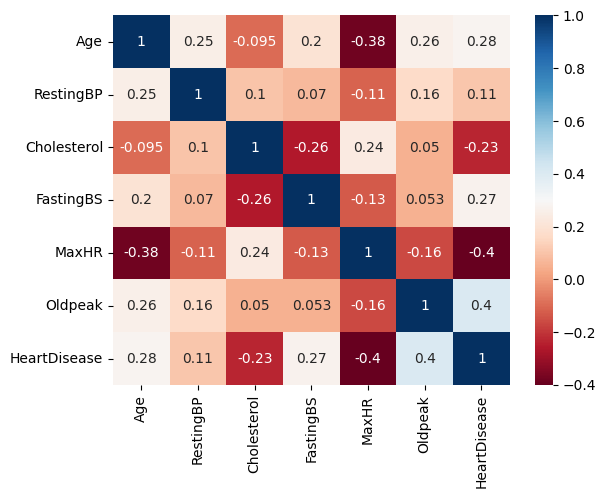

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot= True, cmap = 'RdBu')

Text(0.5, 1.0, 'Distribution of Heart Diseases over Age')

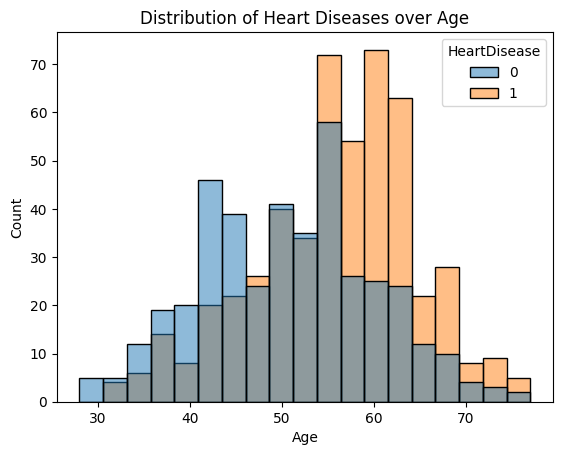

In [ ]:
sns.histplot(data = df ,x = 'Age', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over Age")

In [ ]:
px.histogram(data_frame = df, x = 'Sex', color = 'HeartDisease', title="Distribution of Heart Diseases over Sex",barmode="group")

Text(0.5, 1.0, 'Distribution of Heart Diseases over RestingECG')

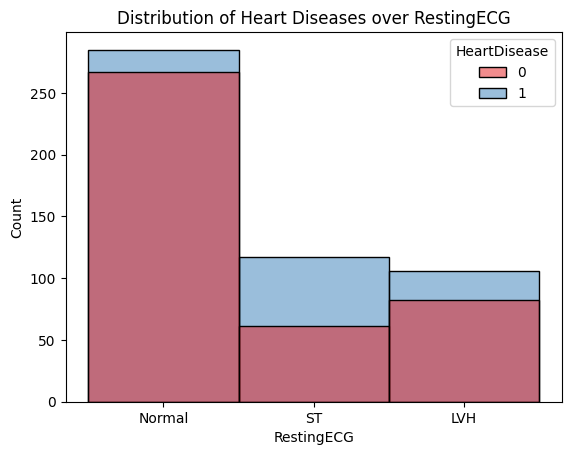

In [ ]:
sns.histplot(data = df ,x = 'RestingECG', hue = 'HeartDisease',palette = 'Set1')
plt.title("Distribution of Heart Diseases over RestingECG")

In [ ]:
px.histogram(data_frame = df, x = 'ChestPainType', color = 'HeartDisease', title="Distribution of Heart Diseases over ChestPainType",barmode="group")

[]

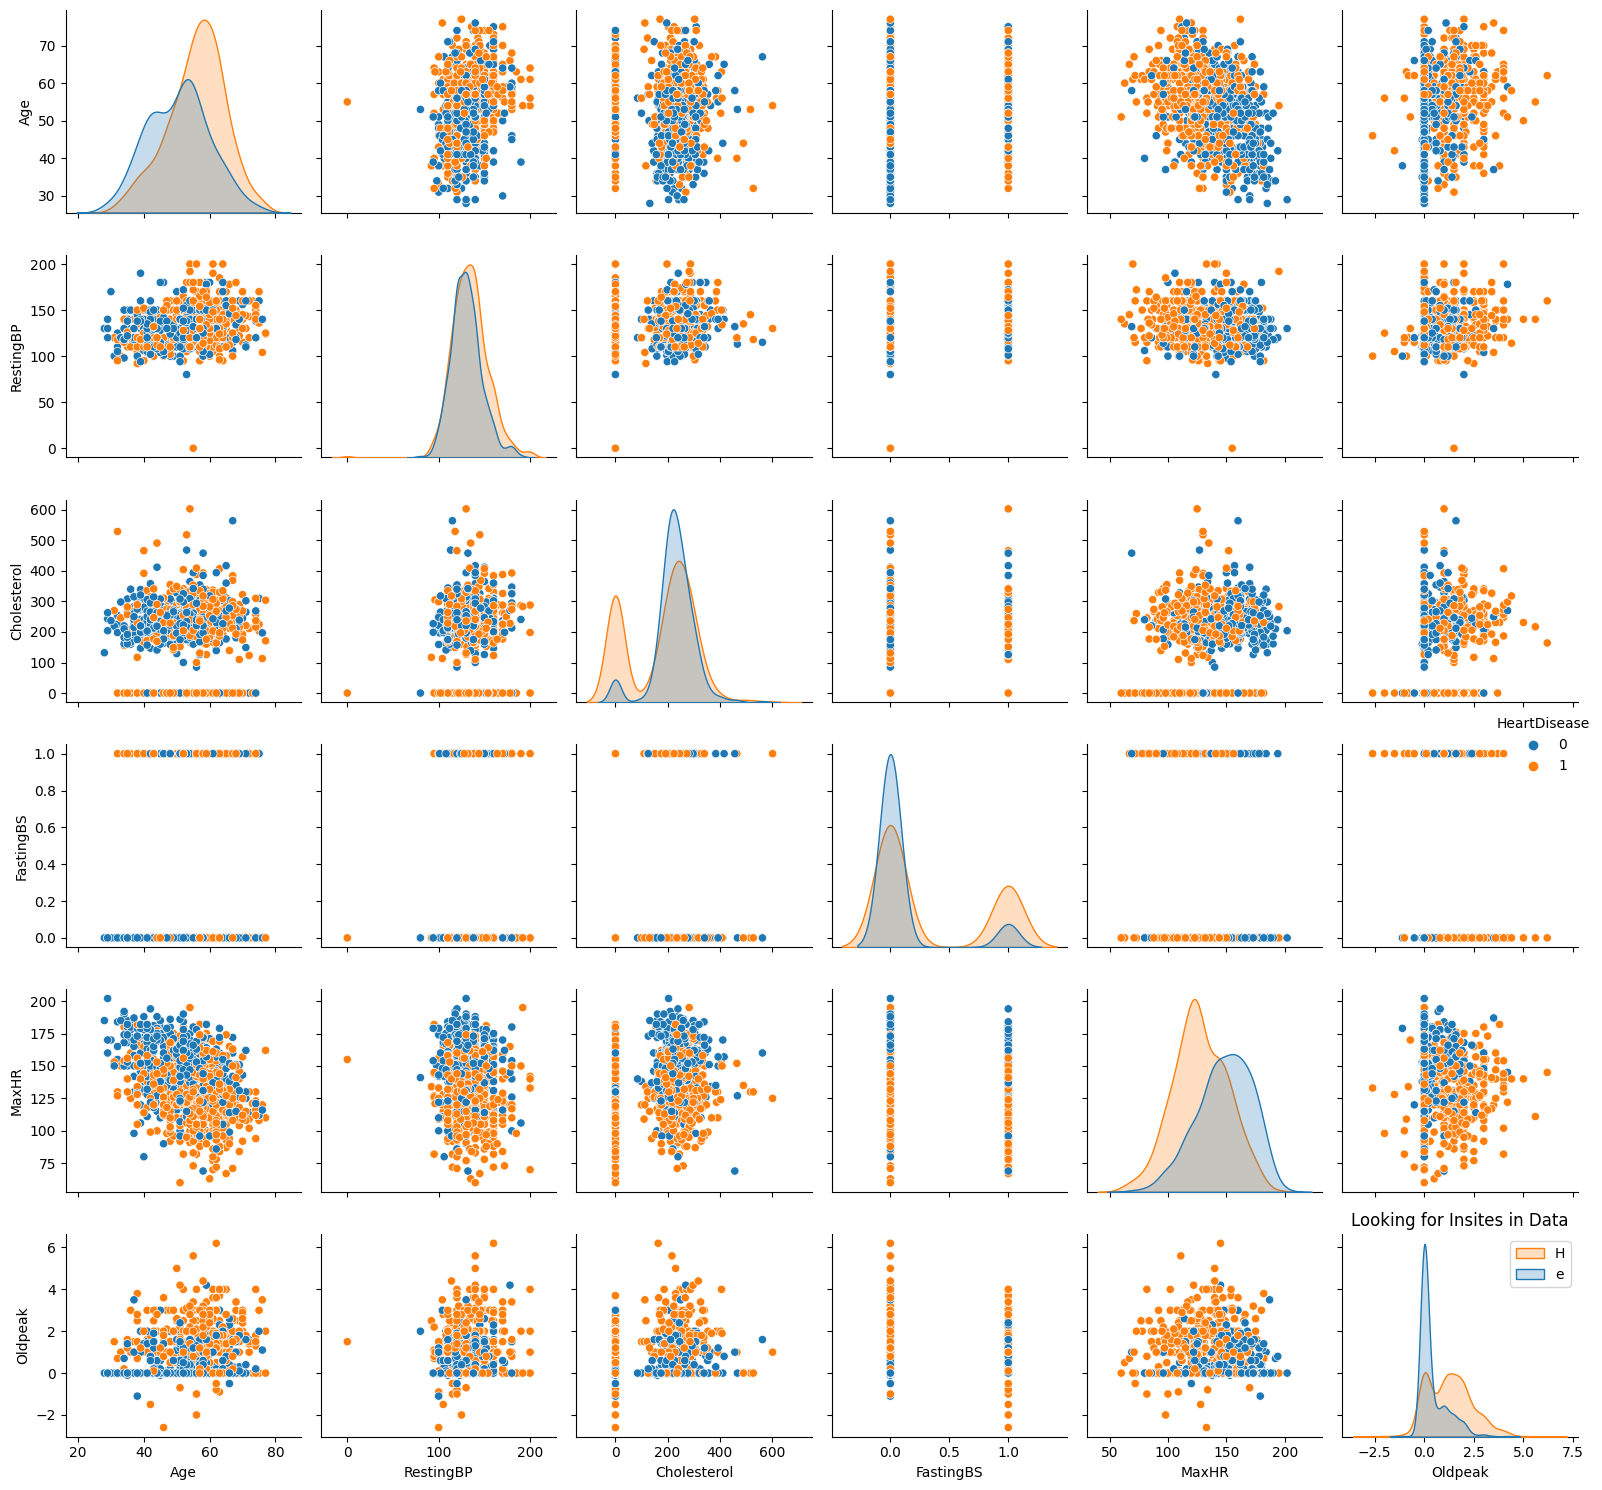

In [ ]:
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

### Check the Distribution and Skewness of the features

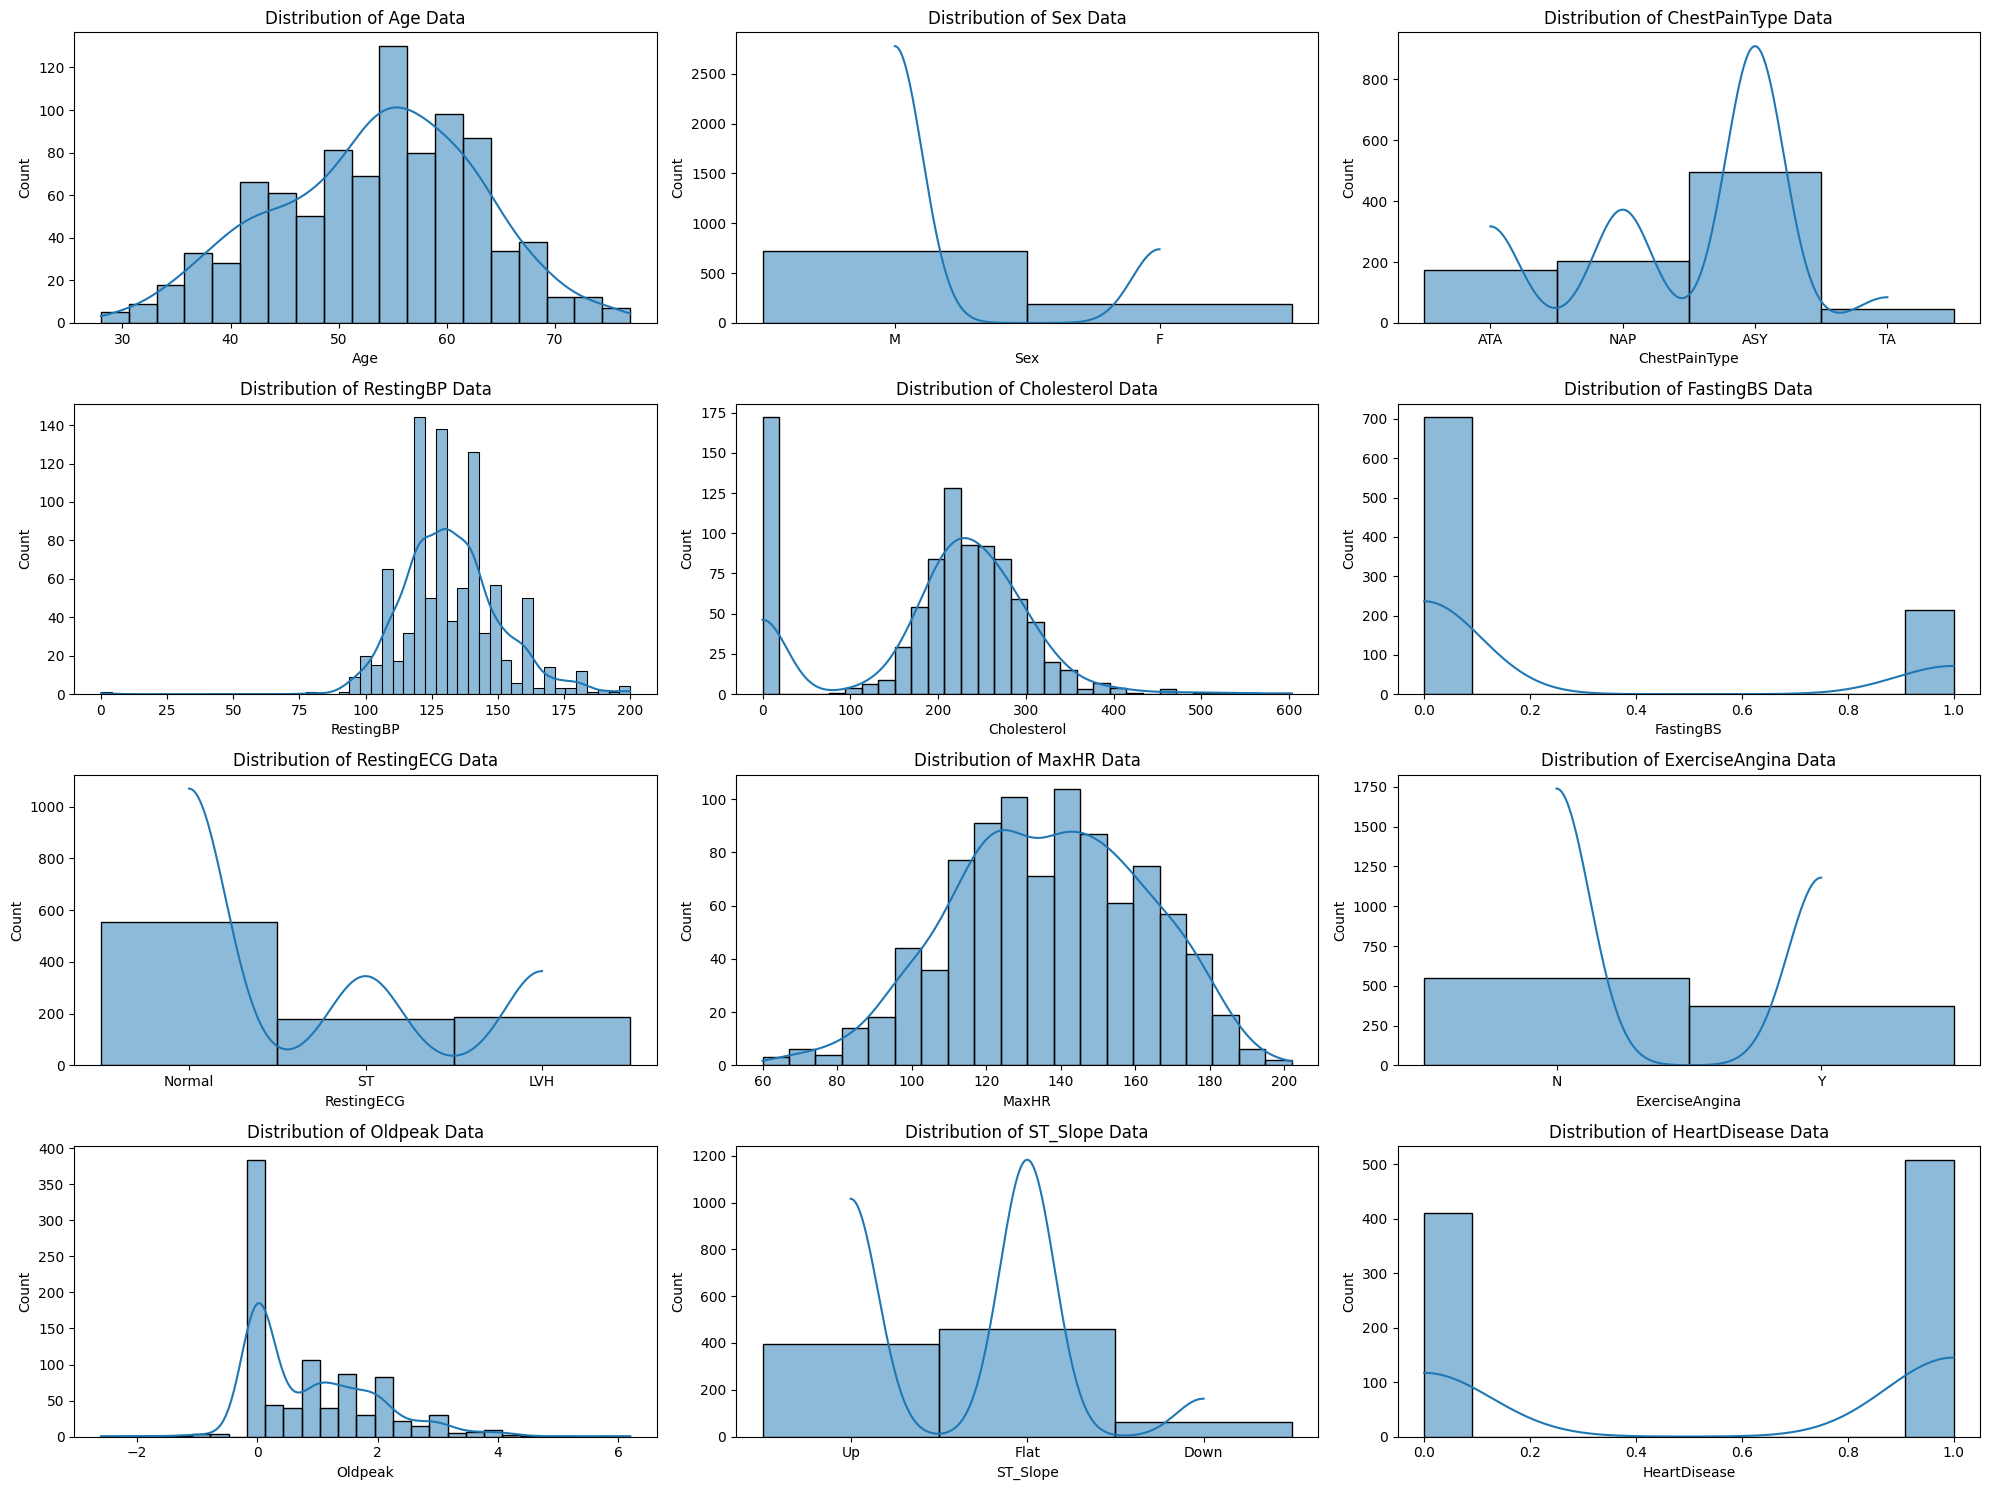

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

### Check the Outliers using Box Plots

In [ ]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP")
fig.show()

In [ ]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age",color="Sex")
fig.show()

In [ ]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol",color="Sex")
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR",color="Sex")
fig.show()

### Robust Scaler will be used later to prevent the outliers from causing training problems to Non-Tree algorithims

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [ ]:
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
target = 'HeartDisease'

In [ ]:
X = df[features]
y = df[target]

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split

Encoding

In [ ]:
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)
X

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     12    1              1         41          147          0           1   
1     21    0              2         55           40          0           1   
2      9    1              1         31          141          0           2   
3     20    0              0         39           72          0           1   
4     26    1              2         49           53          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   17    1              3         14          122          0           1   
914   40    1              0         45           51          1           1   
915   29    1              0         31            9          0           1   
916   29    0              1         31           94          0           0   
917   10    1              2         39           35          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0       98               0       10         2  
1       82               0       20         1  
2       25               0       10         2  
3       34               1       25         1  
4       48               0       10         2  
..     ...             ...      ...       ...  
913     58               0       22         1  
914     67               0       42         1  
915     41               1       22         1  
916    100               0       10         1  
917     99               0       10         2  

[918 rows x 11 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify = y)

### **Modelling**

Tree Algorithims

In [ ]:
feature_col_tree= X_train.columns.to_list()

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
predictors = feature_col_tree
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train)

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Perform cross-validation:
    if performCV:
        cv_score = cross_validate(alg, dtrain[predictors], y_train, cv=cv_folds, scoring='accuracy')

    accuracy = metrics.accuracy_score(np.array(y_train),np.array(dtrain_predictions))
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : \n" + f'{accuracy}')
    #print ("AUC Score (Train): %f" + f'{metrics.roc_auc_score(dtrain['Decision'], dtrain_predprob)})

    if performCV:
         print ("CV Score :" f'{cv_score}')

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Gradient Boosting Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import confusion_matrix


Model Report
Accuracy : 
0.9578488372093024
CV Score :{'fit_time': array([0.16462016, 0.17784786, 0.15797639, 0.16551948, 0.17040563,
       0.15508175, 0.1733408 , 0.1598196 , 0.15286994, 0.16241241]), 'score_time': array([0.0025394 , 0.00251532, 0.00328755, 0.00295281, 0.00275373,
       0.00589681, 0.00272584, 0.00275159, 0.00276613, 0.00372291]), 'test_score': array([0.85507246, 0.7826087 , 0.86956522, 0.89855072, 0.82608696,
       0.86956522, 0.86956522, 0.84057971, 0.82352941, 0.83823529])}


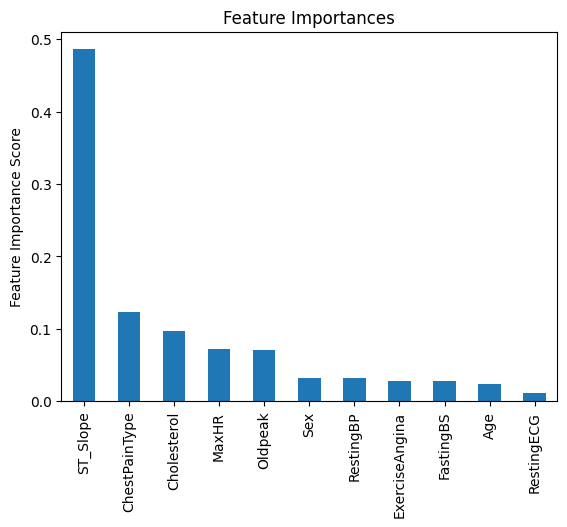

In [ ]:
gbc = GradientBoostingClassifier(random_state=10)
modelfit(gbc, X_train, predictors)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
param_test = {'max_features':range(2,6,2)}
gsearch = GridSearchCV (estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 60,max_depth = 9, min_samples_split = 15, subsample = 0.8, random_state=10),
param_grid = param_test, scoring='accuracy',n_jobs = -1,cv=10)
gsearch.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  min_samples_split=15,
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'max_features': range(2, 6, 2)},
             scoring='accuracy')


Model Report
Accuracy : 
1.0
CV Score :{'fit_time': array([0.14124489, 0.15758491, 0.14741659, 0.15863299, 0.14449406,
       0.16977572, 0.13992667, 0.15178323, 0.14512539, 0.15074992]), 'score_time': array([0.00299144, 0.00305581, 0.00324178, 0.00304198, 0.00293469,
       0.00300097, 0.00299621, 0.00291753, 0.00300312, 0.00324082]), 'test_score': array([0.85507246, 0.85507246, 0.85507246, 0.91304348, 0.84057971,
       0.84057971, 0.86956522, 0.84057971, 0.80882353, 0.82352941])}


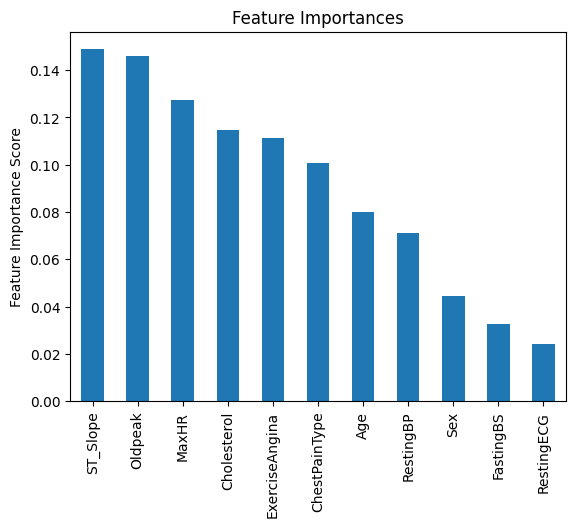

In [ ]:
modelfit(gsearch.best_estimator_, X_train, predictors)

In [ ]:
param_test2 = {'min_samples_split':range(10,500,20),'learning_rate':np.arange(0.02, 0.1, 0.02),'max_features':range(2,6,2)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(max_features=4,n_estimators=100,max_depth=10,min_samples_leaf=40, random_state=10),
                        param_grid = param_test2,
                        scoring='accuracy',
                        cv=10)
gsearch2.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=10, max_features=4,
                                                  min_samples_leaf=40,
                                                  random_state=10),
             param_grid={'learning_rate': array([0.02, 0.04, 0.06, 0.08]),
                         'max_features': range(2, 6, 2),
                         'min_samples_split': range(10, 500, 20)},
             scoring='accuracy')


Model Report
Accuracy : 
0.9127906976744186
CV Score :{'fit_time': array([0.09969831, 0.10902333, 0.10464859, 0.10229421, 0.10774279,
       0.10602808, 0.12064838, 0.1060698 , 0.10308242, 0.1004107 ]), 'score_time': array([0.00279045, 0.00287724, 0.00269771, 0.0025537 , 0.00256181,
       0.00264525, 0.00259805, 0.00254536, 0.00254583, 0.00274968]), 'test_score': array([0.85507246, 0.85507246, 0.85507246, 0.94202899, 0.82608696,
       0.85507246, 0.88405797, 0.89855072, 0.83823529, 0.86764706])}


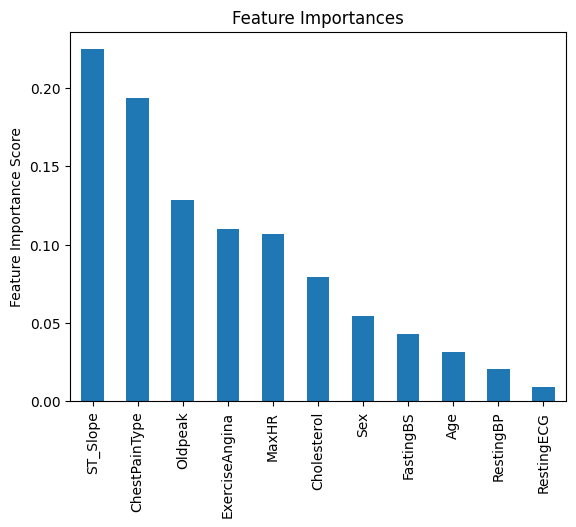

In [ ]:
modelfit(gsearch2.best_estimator_, X_train, predictors)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_param_test3 = {'min_samples_split':range(30,50,10),'min_samples_leaf':range(4,20,4),'max_depth':range(5,12,3)}
rf_gsearch = GridSearchCV(estimator = RandomForestClassifier(max_features=10,n_estimators=100, random_state=10),
                        param_grid = rf_param_test3 ,
                        scoring='accuracy',
                        cv=10)
rf_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=10, random_state=10),
             param_grid={'max_depth': range(5, 12, 3),
                         'min_samples_leaf': range(4, 20, 4),
                         'min_samples_split': range(30, 50, 10)},
             scoring='accuracy')


Model Report
Accuracy : 
0.8822674418604651
CV Score :{'fit_time': array([0.39352679, 0.41657019, 0.42995358, 0.40061378, 0.35558462,
       0.34811068, 0.34589195, 0.41305876, 0.37037015, 0.3596375 ]), 'score_time': array([0.01582694, 0.01363277, 0.01210332, 0.0173645 , 0.0153985 ,
       0.01187873, 0.01182485, 0.0158217 , 0.01222706, 0.01423192]), 'test_score': array([0.86956522, 0.8115942 , 0.84057971, 0.86956522, 0.85507246,
       0.8115942 , 0.85507246, 0.88405797, 0.80882353, 0.80882353])}


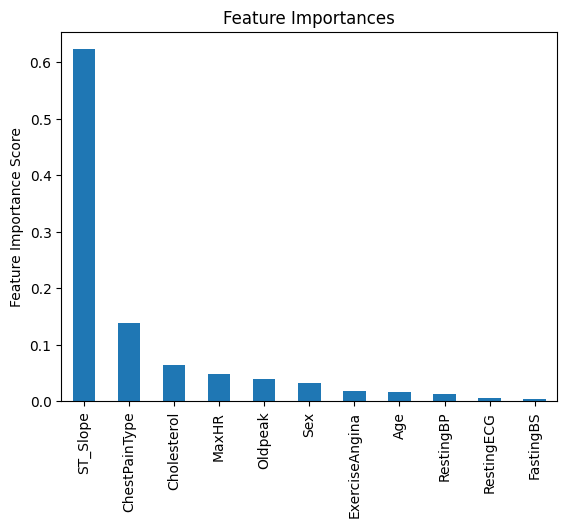

In [ ]:
modelfit(rf_gsearch.best_estimator_, X_train, predictors)

Try the best tree model on test data

In [ ]:
Y_pred = gsearch.best_estimator_.predict(X_test)

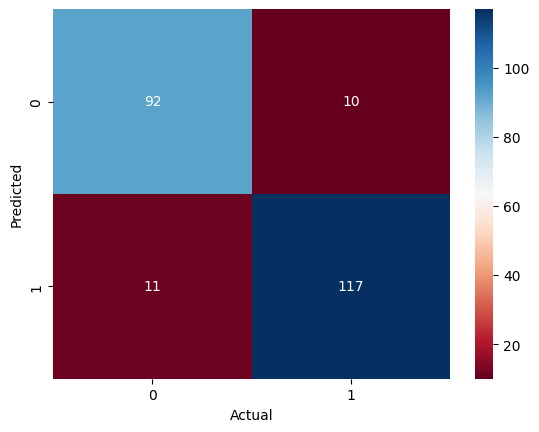

In [ ]:
cm = confusion_matrix(Y_pred,y_test)
plt.figure()
sns.heatmap(cm, annot = True,fmt='d' ,cmap='RdBu')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, target_names = ['Safe','Failure']))

              precision    recall  f1-score   support

        Safe       0.90      0.89      0.90       103
     Failure       0.91      0.92      0.92       127

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



Non - Tree Algorithims

### **One Hot Encoding**

In [ ]:
## Creaeting one hot encoded features for working with non tree based algorithms
X2 = pd.get_dummies(X,columns = object_columns,drop_first=False)
X2.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_0  Sex_1  \
0   12         41          147          0     98       10      0      1   
1   21         55           40          0     82       20      1      0   
2    9         31          141          0     25       10      0      1   
3   20         39           72          0     34       25      1      0   
4   26         49           53          0     48       10      0      1   

   ChestPainType_0  ChestPainType_1  ChestPainType_2  ChestPainType_3  \
0                0                1                0                0   
1                0                0                1                0   
2                0                1                0                0   
3                1                0                0                0   
4                0                0                1                0   

   RestingECG_0  RestingECG_1  RestingECG_2  ExerciseAngina_0  \
0             0             1             0                 1   
1             0             1             0                 1   
2             0             0             1                 1   
3             0             1             0                 0   
4             0             1             0                 1   

   ExerciseAngina_1  ST_Slope_0  ST_Slope_1  ST_Slope_2  
0                 0           0           0           1  
1                 0           0           1           0  
2                 0           0           0           1  
3                 1           0           1           0  
4                 0           0           0           1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, random_state=42,stratify = y)

In [ ]:
X_train

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_0  Sex_1  \
887   15         33          105          1     69       11      0      1   
815   40         21          135          0     77       20      0      1   
754   29         33           65          0     94       10      0      1   
876   32         31           64          0     58       34      0      1   
400   22         55            0          1     36       10      1      0   
..   ...        ...          ...        ...    ...      ...    ...    ...   
201   18         22           88          0     76       10      0      1   
567   43         31           79          0     41       10      0      1   
458   33         35            0          1     14       25      0      1   
252   33         26          150          0     41       10      0      1   
62    17         41           82          0     70       10      0      1   

     ChestPainType_0  ChestPainType_1  ChestPainType_2  ChestPainType_3  \
887                1                0                0                0   
815                0                0                1                0   
754                1                0                0                0   
876                1                0                0                0   
400                1                0                0                0   
..               ...              ...              ...              ...   
201                0                0                1                0   
567                1                0                0                0   
458                1                0                0                0   
252                1                0                0                0   
62                 1                0                0                0   

     RestingECG_0  RestingECG_1  RestingECG_2  ExerciseAngina_0  \
887             1             0             0                 0   
815             0             1             0                 1   
754             0             1             0                 0   
876             1             0             0                 0   
400             0             1             0                 1   
..            ...           ...           ...               ...   
201             0             1             0                 1   
567             0             0             1                 0   
458             0             0             1                 1   
252             0             0             1                 0   
62              0             1             0                 1   

     ExerciseAngina_1  ST_Slope_0  ST_Slope_1  ST_Slope_2  
887                 1           0           1           0  
815                 0           0           0           1  
754                 1           0           0           1  
876                 1           0           1           0  
400                 0           0           1           0  
..                ...         ...         ...         ...  
201                 0           0           0           1  
567                 1           0           1           0  
458                 0           0           1           0  
252                 1           0           0           1  
62                  0           0           0           1  

[780 rows x 20 columns]

### **Robust Scaler**

In [ ]:
scaler = preprocessing.RobustScaler()
scaler = scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X2.columns)
X_test = pd.DataFrame(X_test, columns = X2.columns)

In [ ]:
predictors = X_train.columns

### **K-NN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
rf_param_test4 = {'n_neighbors':range(3,12,2)}
knn_gsearch = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = rf_param_test4 , scoring='accuracy',cv=10)
knn_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 12, 2)}, scoring='accuracy')

In [ ]:
modelfit(knn_gsearch.best_estimator_, X_train, predictors, printFeatureImportance = False)


Model Report
Accuracy : 
0.8897435897435897
CV Score :{'fit_time': array([0.00508308, 0.0032351 , 0.00260329, 0.00243211, 0.00240254,
       0.00267434, 0.00255466, 0.00296211, 0.00257158, 0.00298309]), 'score_time': array([0.0078671 , 0.00635529, 0.00601912, 0.00588584, 0.00938272,
       0.00598693, 0.00599337, 0.00597811, 0.00611854, 0.00612426]), 'test_score': array([0.84615385, 0.85897436, 0.88461538, 0.83333333, 0.83333333,
       0.88461538, 0.87179487, 0.84615385, 0.80769231, 0.85897436])}


### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression


rf_param_test5 = {'warm_start':[True,False]}
LR_gsearch = GridSearchCV(estimator = LogisticRegression(),param_grid = rf_param_test5 , scoring='accuracy',cv=10)
LR_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'warm_start': [True, False]}, scoring='accuracy')

In [ ]:
modelfit(LR_gsearch.best_estimator_, X_train, predictors, printFeatureImportance = False)


Model Report
Accuracy : 
0.8576923076923076
CV Score :{'fit_time': array([0.02789068, 0.02061343, 0.0246954 , 0.03863025, 0.02648044,
       0.02480173, 0.02176285, 0.02623773, 0.02548885, 0.02824783]), 'score_time': array([0.0037272 , 0.00363326, 0.00991869, 0.01157904, 0.00345755,
       0.00346422, 0.00371051, 0.00761032, 0.0035181 , 0.00484228]), 'test_score': array([0.88461538, 0.84615385, 0.88461538, 0.82051282, 0.85897436,
       0.88461538, 0.87179487, 0.82051282, 0.75641026, 0.83333333])}


### **Deep Learning - Artificial Neural Networks**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
model = Sequential()


model.add(Dense(units=20,activation='relu'))

model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics= 'accuracy')

In [ ]:
model.fit(X_train,
          y_train,
          epochs=100,
          callbacks = [callback],
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100
25/25 [==============================] - 2s 15ms/step - loss: 0.6866 - accuracy: 0.5782 - val_loss: 0.6804 - val_accuracy: 0.6304
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.7321 - val_loss: 0.6129 - val_accuracy: 0.7899
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5575 - accuracy: 0.8090 - val_loss: 0.5004 - val_accuracy: 0.8188
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4548 - accuracy: 0.8372 - val_loss: 0.4064 - val_accuracy: 0.8333
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.8423 - val_loss: 0.3618 - val_accuracy: 0.8623
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8436 - val_loss: 0.3434 - val_accuracy: 0.8696
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3516 - accuracy: 0.8449 - val_loss: 0.3375 - val_accuracy: 0.8696
Epoch 8/100


In [ ]:
import pickle

In [ ]:
filename = 'Heart_Failure.sav'
pickle.dump(gsearch ,open(filename,'wb'))

In [ ]:
filename

'Heart_Failure.sav'